# Importing Libraries

In [52]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

# Dataset Preprocessing

In [53]:
df = pd.read_csv("cell_samples.csv")
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

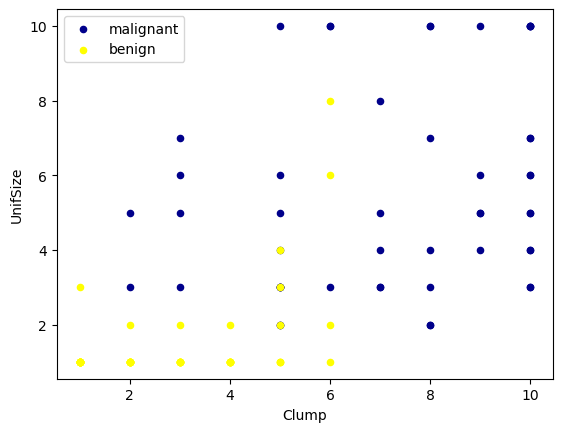

In [54]:
ax = df[df["Class"] == 4][0:50].plot(
    kind="scatter", x="Clump", y="UnifSize", color="DarkBlue", label="malignant"
)
df[df["Class"] == 2][0:50].plot(
    kind="scatter", x="Clump", y="UnifSize", color="Yellow", label="benign", ax=ax
)
plt.show()

# Specifing Dataset Attributes

In [55]:
filtered_df = df[pd.to_numeric(df["BareNuc"], errors="coerce").notnull()]
filtered_df["BareNuc"] = filtered_df["BareNuc"].astype("int")
filtered_df.dtypes

X = filtered_df.iloc[:, :-1].values  # np.asarray(filtered_df)  #


y = filtered_df.iloc[:, -1].values  # np.asarray(df["Class"])  #

C:\Users\omarh\AppData\Local\Temp\ipykernel_16092\191462300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["BareNuc"] = filtered_df["BareNuc"].astype("int")


# Split into Train/Test dataset

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (546, 10) (546,)
Test set: (137, 10) (137,)


# Modeling SVM

In [57]:
from sklearn import svm

clf = svm.SVC(kernel="rbf")
clf.fit(X_train, y_train)

SVC()

# Prediction

In [58]:
yhat = clf.predict(X_test)
print(yhat[0:5])
print(y_test[0:5])

[2 2 2 2 2]
[2 4 2 4 2]


# Evaluation

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [60]:
def plot_confusion_matrix(
    cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues
):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Confusion Matrix

e:\Courses\IBM-Machine-Learning-with-Python-Course\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           2       0.66      1.00      0.79        90
           4       0.00      0.00      0.00        47

    accuracy                           0.66       137
   macro avg       0.33      0.50      0.40       137
weighted avg       0.43      0.66      0.52       137

Confusion matrix, without normalization
[[90  0]
 [47  0]]


e:\Courses\IBM-Machine-Learning-with-Python-Course\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Courses\IBM-Machine-Learning-with-Python-Course\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


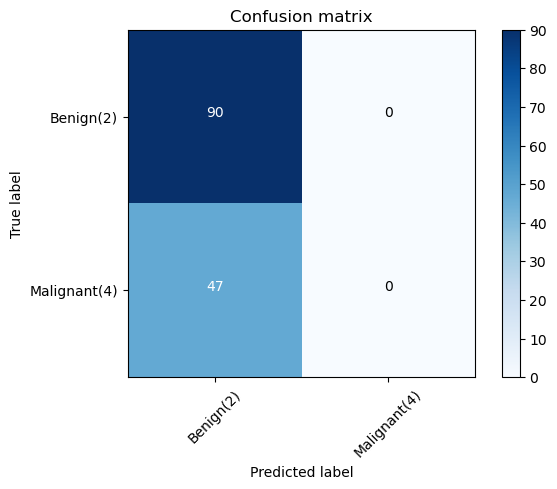

In [61]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2, 4])
np.set_printoptions(precision=2)

print(classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(
    cnf_matrix,
    classes=["Benign(2)", "Malignant(4)"],
    normalize=False,
    title="Confusion matrix",
)

# f1 Score

In [62]:
from sklearn.metrics import f1_score

f1_score(y_test, yhat, average="weighted")

0.5209170712884659